In [1]:
import pandas  as  pd

projects_data = pd.read_csv('Data/projects.csv')

In [2]:
projects_data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
swap ={0:1,1:0}
projects_data['finished'] = projects_data.unfinished.map(swap)


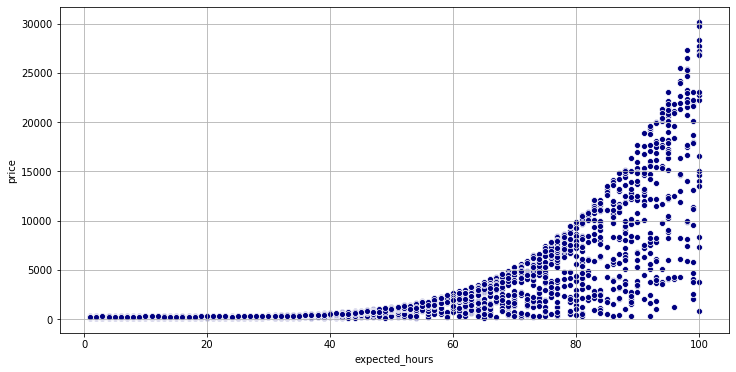

In [4]:
import seaborn as  sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.grid(True)
sns.scatterplot(x='expected_hours', y='price', data=projects_data, color='navy')
plt.show()

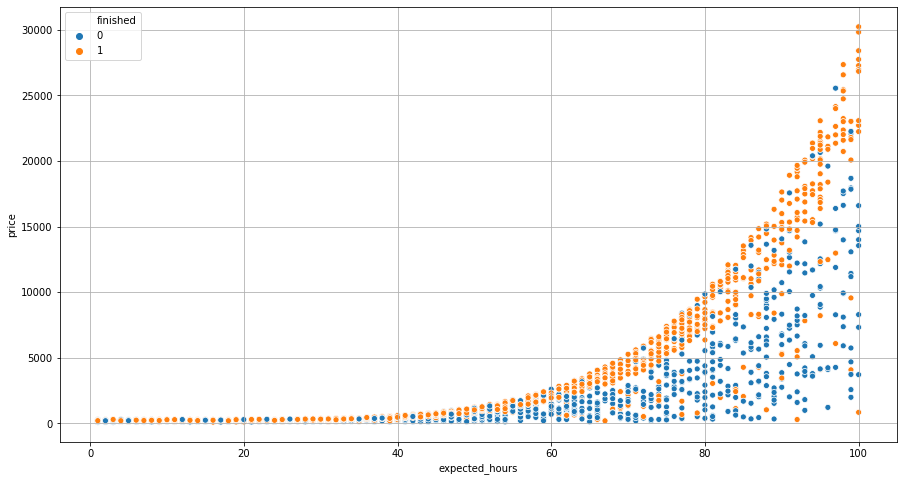

In [5]:
plt.figure(figsize=(15,8))
plt.grid(True)
sns.scatterplot(x='expected_hours', y='price',hue='finished', data=projects_data)
plt.show()

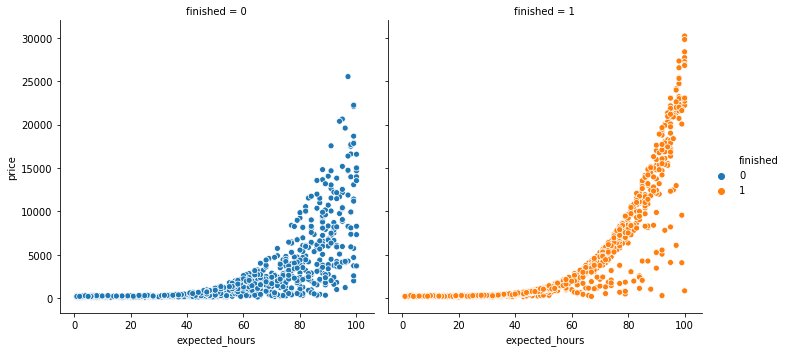

In [6]:
sns.relplot(x='expected_hours', y='price', hue='finished',col='finished',data=projects_data)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler

x = projects_data[['expected_hours', 'price']]
y = projects_data['finished']



SEED = 5
np.random.seed(SEED)

In [8]:
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

In [12]:

model = SVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy = accuracy_score(test_y, previsoes) * 100
print("The accuracy was: %.2f%%" % accuracy)

The accuracy was: 66.85%


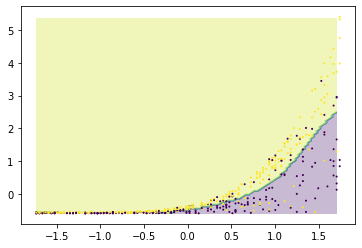

In [14]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()


pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
data = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(data)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

# DECISION BOUNDARY